# Fit a function to a non-linear pattern

This example can be referenced by [citing the package](https://neuropsychology.github.io/NeuroKit/cite_us.html).

This small tutorial will show you how to use Python to estimate the best fitting line to some data. This can be used to find the optimal line passing through a signal.

In [2]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

In [4]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

## Fit a linear function

We will start by generating some random data on a scale from 0 to 10 (the x-axis), and then pass them through a function to create its y values.

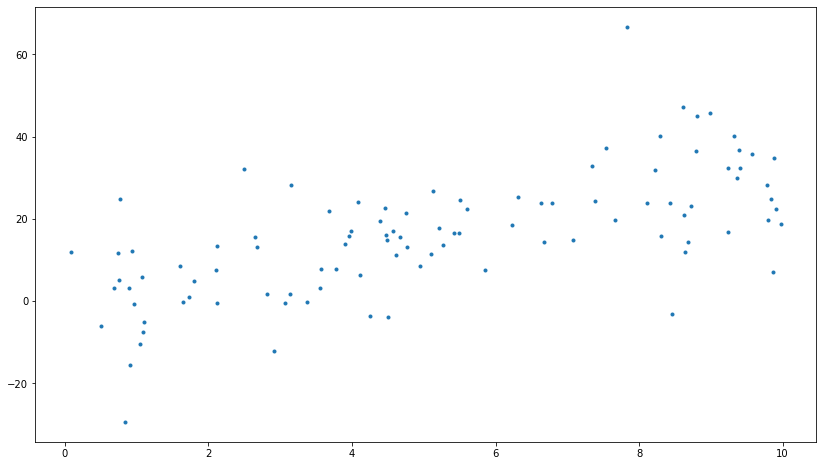

In [3]:
x = np.random.uniform(0., 10., size=100)
y = 3. * x + 2. + np.random.normal(0., 10., 100)
plt.plot(x, y, '.')
plt.show()

In this case we **know** that the best fitting line will be a linear function (i.e., a straight line), and we want to find its parameters. A linear function has two parameters, the **intercept** and the **slope**.

First, we need to create this function, that takes some **x** values, the parameters, and return the **y** value.

In [4]:
def function_linear(x, intercept, slope):
    y =  intercept + slope * x
    return y

Now, using the power of **scipy**, we can optimize this function based on our data to find the parameters that minimize the least square error. It just needs the function and the data's x and y values.

In [5]:
params, covariance = scipy.optimize.curve_fit(function_linear, x, y)
params

array([-0.96469448,  3.26080722])

So the optimal parameters (in our case, the **intercept** and the **slope**) are returned in the **params** object. We can unpack these parameters (using the star symbol \*) into our linear function to use them, and create the predicted **y** values to our **x** axis.

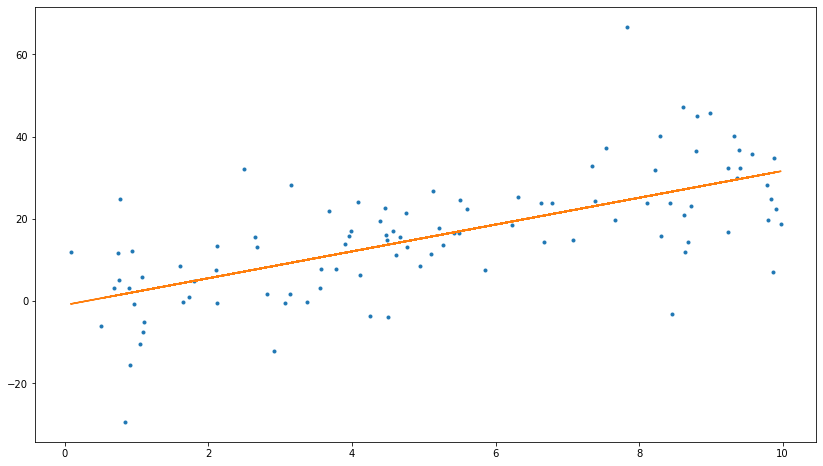

In [6]:
fit = function_linear(x, *params)

plt.plot(x, y, '.')
plt.plot(x, fit, '-')
plt.show()

## Non-linear curves

We can also use that to approximate non-linear curves.

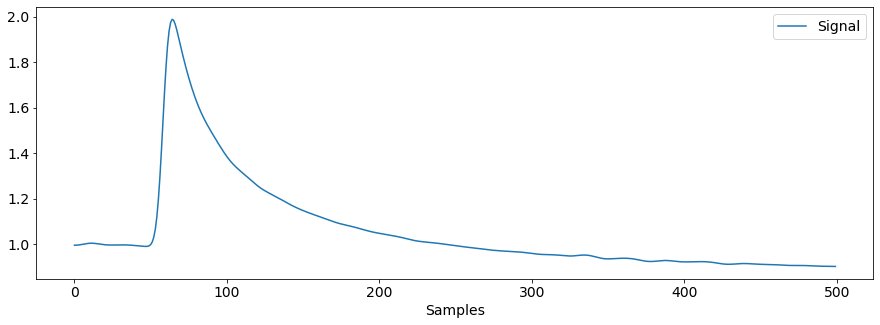

In [7]:
signal = nk.eda_simulate(sampling_rate=50)
nk.signal_plot(signal)

In this example, we will try to approximate this Skin Conductance Response (SCR) using a [gamma distribution](https://github.com/neuropsychology/NeuroKit/pull/269), which is quite a flexible distribution defined by 3 parameters (**a**, **loc** and **scale**).

On top of these 3 parameters, we will add 2 more, the **intercept** and a **size** parameter to give it more flexibility.

In [1]:
def function_gamma(x, intercept, size, a, loc, scale):
    gamma = scipy.stats.gamma.pdf(x, a=a, loc=loc, scale=scale)
    y = intercept + (size * gamma)
    return y

We can start by visualizing the function with a "arbitrary" parameters:

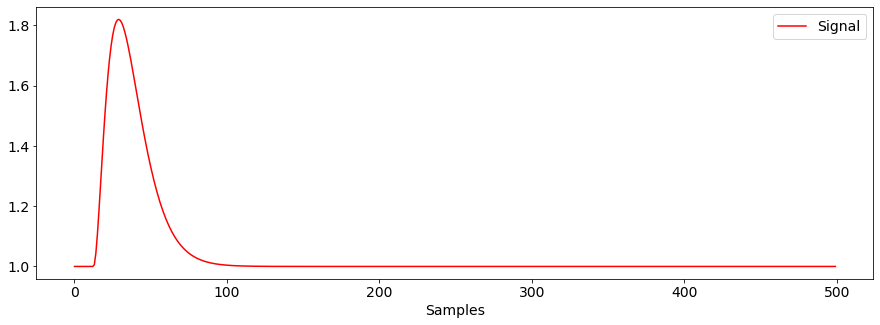

In [5]:
x = np.linspace(0, 20, num=500)
y = function_gamma(x, intercept=1, size=1, a=3, loc=0.5, scale=0.33)

nk.signal_plot(y, color="red")

Since these values are already a good start, we will use them as "starting point" (through the `p0` argument), to help the estimation algorithm converge (otherwise it could never find the right combination of parameters).

In [9]:
params, covariance = scipy.optimize.curve_fit(function_gamma, x, signal, p0=[1, 1, 3, 0.5, 0.33])
params

array([0.95156425, 2.20476625, 1.03377196, 2.32464928, 2.03269762])

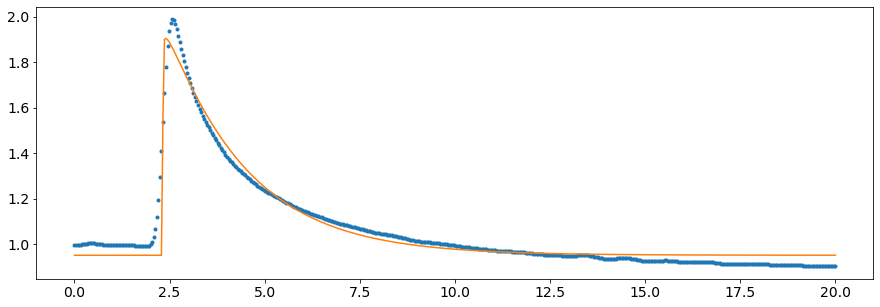

In [10]:
fit = function_gamma(x, *params)

plt.plot(x, signal, '.')
plt.plot(x, fit, '-')
plt.show()